In [1]:
from physics_sims import SimRunner, Oscillator1DSim, Oscillator1DSRSim, Oscillator1DSRBoostSim
import matplotlib.pyplot as plt
import numpy as np
import spacetimelib as st

In [2]:
t = 0
x = 0
v = 0.9
m = 0.25
k = 4
run_time = 5
time_delta = 0.001

trajectory = SimRunner().run_headless(
    Oscillator1DSim(t=t, x=x, v=v, m=m, k=k),
    run_time,
    time_delta=time_delta)

trajectory_sr = SimRunner().run_headless(
    Oscillator1DSRSim(t=t, x=x, v=v, m=m, k=k),
    run_time,
    time_delta=time_delta)

v_boost = 0.5


run_time_boost = run_time / (1 - v_boost**2)**0.5
start_event = st.boost([0, x], v_boost)
trajectory_sr_boost = SimRunner().run_headless(
    Oscillator1DSRBoostSim(
        t=start_event[0],
        x=start_event[1],
        v=st.boost_velocity_s(v, v_boost),
        m=m,
        k=k,
        v_boost=v_boost
    ),
    run_time_boost,
    time_delta=time_delta
)

w_boost_check = st.Worldline(trajectory_sr[:, [0, 1]]).boost(v_boost)
# Cut the worldline down to only the time range we want
vertices = w_boost_check._vertices
vertices = vertices[np.where(vertices[:, 0] <= start_event[0] + run_time_boost)]
w_boost_check._vertices = vertices

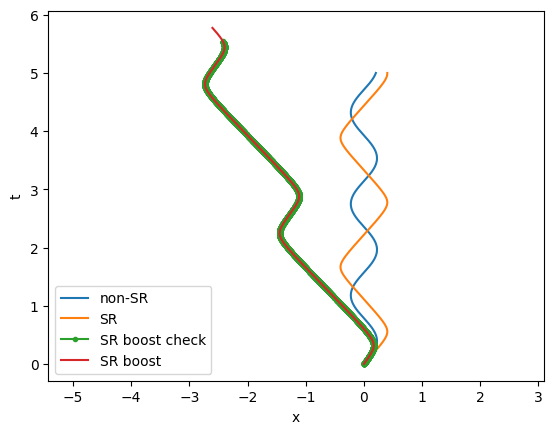

In [3]:
plt.plot(*trajectory[:, [1, 0]].T, label='non-SR')
plt.plot(*trajectory_sr[:, [1, 0]].T, label='SR')
plt.plot(*w_boost_check.plot(), label='SR boost check', marker='.')
plt.plot(*trajectory_sr_boost[:, [1, 0]].T, label='SR boost')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.axis('equal')
plt.show()

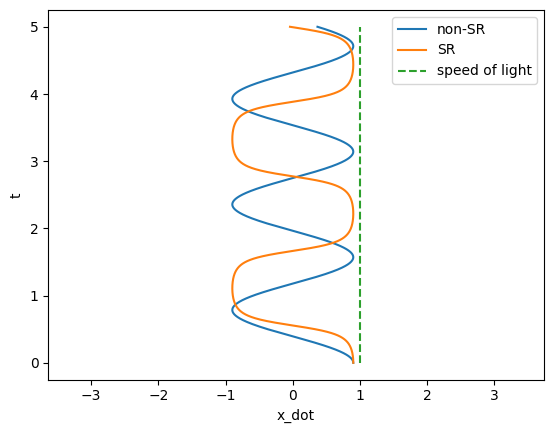

In [4]:
plt.plot(*trajectory[:, [2, 0]].T, label='non-SR')
plt.plot(*trajectory_sr[:, [2, 0]].T, label='SR')
plt.plot([1, 1], [0, run_time], label='speed of light', linestyle='dashed')
plt.legend()
plt.xlabel('x_dot')
plt.ylabel('t')
plt.axis('equal')
plt.show()

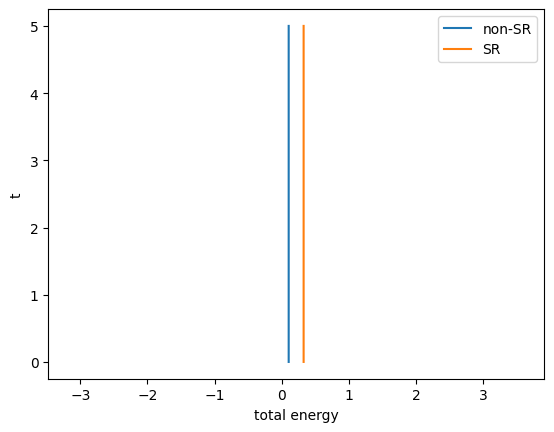

In [5]:
plt.plot(*trajectory[:, [-1, 0]].T, label='non-SR')
plt.plot(*trajectory_sr[:, [-1, 0]].T, label='SR')
plt.legend()
plt.xlabel('total energy')
plt.ylabel('t')
plt.axis('equal')
plt.show()

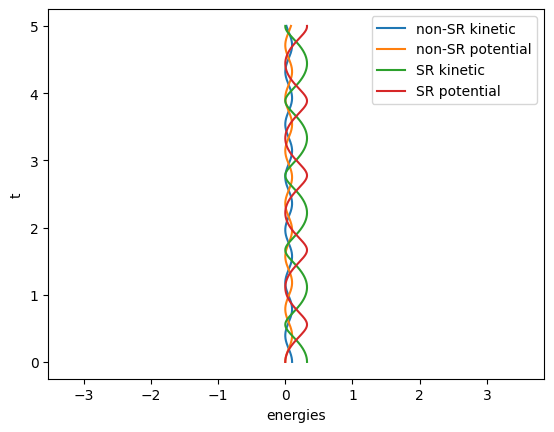

In [6]:
plt.plot(*trajectory[:, [-3, 0]].T, label='non-SR kinetic')
plt.plot(*trajectory[:, [-2, 0]].T, label='non-SR potential')
plt.plot(*trajectory_sr[:, [-3, 0]].T, label='SR kinetic')
plt.plot(*trajectory_sr[:, [-2, 0]].T, label='SR potential')
plt.legend()
plt.xlabel('energies')
plt.ylabel('t')
plt.axis('equal')
plt.show()